### Formula:

$$ C(u) = \frac{\sum_{i=0}^n N_{i,p}(u)w_iP_i}{\sum_{i=0}^n N_{i,p}(u)w_i} $$

can be  represented as,

$$ C(u) = \sum_{i=0}^n R_{i,p}(u) P_i $$

where,

$$ R(i,p) = \frac{N_{i,p}(u)w_i}{\sum_{i=0}^n N_{i,p}(u)w_i} $$

In [163]:
import numpy as np
import matplotlib.pyplot as plt

# B-spline basis function
def N(i,p,t,T):
    if p == 0:
        return 1 if T[i] <= t < T[i+1] else 0
    if T[i+p] == T[i]:
        c1 = 0
    else:
        c1 = (t - T[i])/(T[i+p] - T[i]) * N(i,p-1,t,T)
    if T[i+p+1] == T[i+1]:
        c2 = 0
    else:
        c2 = (T[i+p+1] - t)/(T[i+p+1] - T[i+1]) * N(i+1,p-1,t,T)
    return c1 + c2

# B-spline curve
def S(t,p,T,C):
    n = len(T) - p - 1
    return sum(C[i]*N(i,p,t,T) for i in range(n))

# Rational B-spline curve
def R(t,p,T,C,W):
    n = len(T) - p - 1
    num = sum(W[i]*C[i]*N(i,p,t,T) for i in range(n))
    den = sum(W[i]*N(i,p,t,T) for i in range(n))
    if den == 0:
        return 0
    else:
        return num/den

# Generate knot vector (clamped or non-clamped)
def generate_knot_vector(n, p, clamped=True):
    if clamped:
        return [0] * (p + 1) + list(range(1, n - p)) + [n - p] * (p + 1)
    else:
        return list(range(n + p + 1))


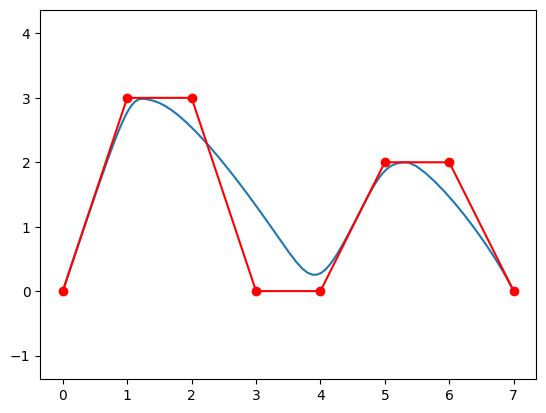

In [166]:
#Example 1

# Control points
C = np.array([[0,0],[1,3],[2,3],[3,0],[4,0],[5,2],[6,2],[7,0]])

# Weights
W = np.array([1,1,0.1,0.01,0.3,1,0.5,1])

# Non periodic Knot vector
T = [0,0,0,1,2,3,4,5,5,6,6,6]

# Degree
p = 3

# Number of points
t = np.linspace(0.01,5.99,100)

# Rational B-spline curve
x = [R(i,p,T,C[:,0],W) for i in t]
y = [R(i,p,T,C[:,1],W) for i in t]

# Plot
plt.plot(x,y)
plt.plot(C[:,0],C[:,1],'ro-')
plt.axis('equal')
plt.show()

#### Influence of weights

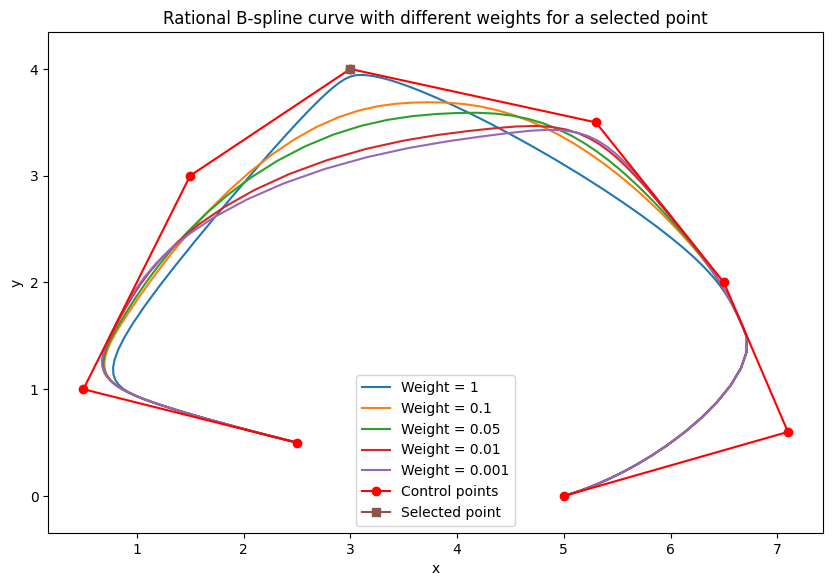

In [204]:
# Display the same curve with different weights for a one point

# Control points
C = np.array([[2.5,0.5],[0.5,1],[1.5,3],[3,4],[5.3,3.5],[6.5,2.0],[7.1,0.6],[5,0]])

# Weights
W = np.array([0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3])

# Non periodic Knot vector
T = [0,0,0,1,2,3,4,5,5,6,6,6]

# Degree
p = 3

# Number of points
t = np.linspace(0.01,5.99,100)

weights = [1,0.1,0.05,0.01,0.001]

selected_point = 3

plt.figure(figsize=(10,6.5))
for weight in weights:
    W = np.array([1,1,0.1,0.01,0.3,1,0.5,1])
    W[selected_point] = weight
    # Rational B-spline curve
    x = [R(i,p,T,C[:,0],W) for i in t]
    y = [R(i,p,T,C[:,1],W) for i in t]

    # Plot
    plt.plot(x,y,label='Weight = '+str(weight))

# set legend location
plt.plot(C[:,0],C[:,1],'ro-',label='Control points')
plt.plot(C[selected_point,0],C[selected_point,1],label='Selected point',marker='s')
plt.axis('equal')
plt.title('Rational B-spline curve with different weights for a selected point')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower center')
plt.show()

### An Elipse

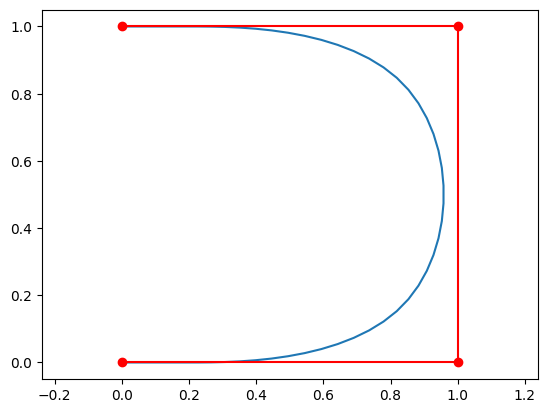

In [188]:
# Control points
C = np.array([[0,0],[1,0],[1,1],[0,1]])

# Weights
W = np.array([1,1,1,1])

# Degree
p = 3

# Non periodic Knot vector
T = [0,1,2,3,4,5,6,7]
#T = generate_knot_vector(len(C), p, False)

# Number of points
t = np.linspace(0.01,6.99,100)

# Rational B-spline curve
x = [R(i,p,T,C[:,0],W) for i in t]
y = [R(i,p,T,C[:,1],W) for i in t]

# Plot
plt.plot(x,y)
plt.plot(C[:,0],C[:,1],'ro-')
plt.axis('equal')
plt.show()

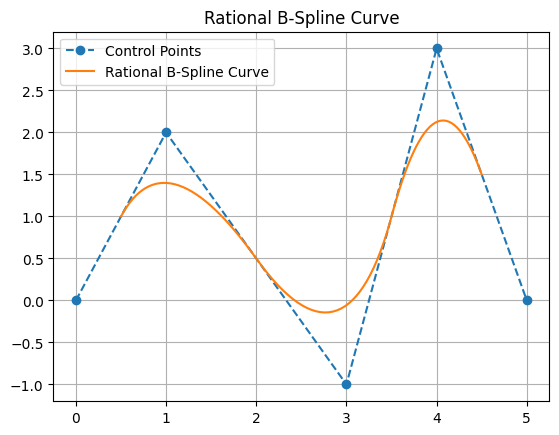

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# B-spline basis function
def N(i, p, t, T):
    if p == 0:
        return 1 if T[i] <= t < T[i + 1] else 0
    if T[i + p] == T[i]:
        c1 = 0
    else:
        c1 = (t - T[i]) / (T[i + p] - T[i]) * N(i, p - 1, t, T)
    if T[i + p + 1] == T[i + 1]:
        c2 = 0
    else:
        c2 = (T[i + p + 1] - t) / (T[i + p + 1] - T[i + 1]) * N(i + 1, p - 1, t, T)
    return c1 + c2

# B-spline curve
def S(t, p, T, C):
    n = len(T) - p - 1
    return sum(C[i] * N(i, p, t, T) for i in range(n))

# Rational B-spline curve
def R(t, p, T, C, W):
    n = len(T) - p - 1
    num = sum(W[i] * C[i] * N(i, p, t, T) for i in range(n))
    den = sum(W[i] * N(i, p, t, T) for i in range(n))
    if den == 0:
        return 0
    else:
        return num / den

# Generate knot vector (clamped or non-clamped)
def generate_knot_vector(n, p, clamped=True):
    if clamped:
        return [0] * (p + 1) + list(range(1, n - p)) + [n - p] * (p + 1)
    else:
        return list(range(n + p + 1))

# Example Usage
if __name__ == "__main__":
    # Degree of the spline
    p = 2  # Quadratic

    # Control points
    C = np.array([[0, 0], [1, 2], [3, -1], [4, 3], [5, 0]])

    # Weights
    W = np.array([1, 1, 1, 1, 1])

    # Knot vector (try clamped or non-clamped)
    clamped = False  # Change this to True for clamped knots
    T = generate_knot_vector(len(C), p, clamped)

    # Evaluate the curve
    t_values = np.linspace(T[p], T[-p - 1], 100)
    curve = np.array([R(t, p, T, C, W) for t in t_values])

    # Plot the curve
    plt.figure()
    plt.plot(C[:, 0], C[:, 1], "o--", label="Control Points")
    plt.plot(curve[:, 0], curve[:, 1], label="Rational B-Spline Curve")
    plt.title("Rational B-Spline Curve")
    plt.legend()
    plt.grid()
    plt.show()
